# New Orleans Crime Stats for 2019
---
## Starter Code to Import Libraries and Load Crime Statistics

The dataset is for all of the Police Reports filed by NOPD officers including incident and supplemental reports containing the item number, location, disposition, signal, charges, offender race, offender gender, offender age, victim age, victim gender, and victim race for the year 2019.


In [91]:
# Dependencies and Setup
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [92]:
# Load the csv into a Pandas Data Frame
crime_2019 = pd.read_csv("Resources/police2019.csv")

# Examine the data frame
crime_2019.head()


,Item_Number,Year,District,Location,Disposition,Signal_Type,Signal_Description,Occurred_Date_Time,Charge_Code,Charge_Description,...,Offender_Age,Offender_Number,Person_Type,Victim_Race,Victim_Gender,Victim_Age,Victim_Number,Victim_Fatal_Status,Hate_Crime,Report_Type
0,A-00021-19,2019,4,3020 PARC FONTAINE #820,OPEN,94,ILLEGAL USE OF WEAPONS,1/1/19 0:03,14 94,ILLEGAL USE OF WEAPONS,...,NaN,1.0,VICTIM,BLACK,MALE,22.0,1.0,Non-fatal,NaN,Incident Report
1,A-00021-19,2019,4,3020 PARC FONTAINE #820,OPEN,94,ILLEGAL USE OF WEAPONS,1/1/19 0:03,14 56,SIMPLE CRIMINAL DAMAGE TO PROPERTY,...,NaN,1.0,VICTIM,BLACK,MALE,22.0,1.0,Non-fatal,NaN,Incident Report
2,A-00033-19,2019,6,1800 MARTIN LUTHER KING JR BD,CLOSED,67AR,AUTO THEFT & RECOVERY,1/1/19 0:13,14 67.26,THEFT OF A MOTOR VEHICLE,...,NaN,2.0,VICTIM,BLACK,FEMALE,35.0,1.0,Non-fatal,NaN,Incident Report
3,A-00033-19,2019,6,1800 MARTIN LUTHER KING JR BD,CLOSED,67AR,AUTO THEFT & RECOVERY,1/1/19 0:13,NaN,NaN,...,20.0,1.0,REPORTING PERSON,BLACK,FEMALE,61.0,2.0,Non-fatal,NaN,Incident Report
4,A-00033-19,2019,6,1800 MARTIN LUTHER KING JR BD,CLOSED,67AR,AUTO THEFT & RECOVERY,1/1/19 0:13,NaN,NaN,...,NaN,2.0,REPORTING PERSON,BLACK,FEMALE,61.0,2.0,Non-fatal,NaN,Incident Report


In [93]:
# Examine the data types within the dataset
crime_2019.dtypes

Item_Number             object
Year                     int64
District                 int64
Location                object
Disposition             object
Signal_Type             object
Signal_Description      object
Occurred_Date_Time      object
Charge_Code             object
Charge_Description      object
Offender_Race           object
Offender_Gender         object
Offender_Age           float64
Offender_Number        float64
Person_Type             object
Victim_Race             object
Victim_Gender           object
Victim_Age             float64
Victim_Number          float64
Victim_Fatal_Status     object
Hate_Crime              object
Report_Type             object
dtype: object

In [94]:
len(crime_2019.index)

120206

In [95]:
# Convert Occurred_Date_Time from integer to date time.
crime_2019['Occurred_Date_Time'] = pd.to_datetime(crime_2019['Occurred_Date_Time'], utc=True)
crime_2019['Occurred_Date_Time'].dt.date

0         2019-01-01
1         2019-01-01
2         2019-01-01
3         2019-01-01
4         2019-01-01
             ...    
120201    2019-12-07
120202    2019-12-06
120203    2019-12-06
120204    2019-12-07
120205    2019-12-04
Name: Occurred_Date_Time, Length: 120206, dtype: object

In [96]:
# This code replaces the date/time in Occurred_Date_Time column with only the date.
crime_2019["Occurred_Date_Time"] = crime_2019["Occurred_Date_Time"].dt.date
print(crime_2019)

       Item_Number  Year  District                          Location  \
0       A-00021-19  2019         4          3020 PARC FONTAINE  #820   
1       A-00021-19  2019         4          3020 PARC FONTAINE  #820   
2       A-00033-19  2019         6     1800 MARTIN LUTHER KING JR BD   
3       A-00033-19  2019         6     1800 MARTIN LUTHER KING JR BD   
4       A-00033-19  2019         6     1800 MARTIN LUTHER KING JR BD   
...            ...   ...       ...                               ...   
120201  X-00055-19  2019         8                    511 BOURBON ST   
120202  X-00056-19  2019         7                     9630 Hayne BD   
120203  X-00056-19  2019         7                     9630 Hayne BD   
120204  X-00057-19  2019         8  1500 CONVENTION CENTER BD #70130   
120205  X-00064-19  2019         1                  216 MARAIS ST #F   

       Disposition Signal_Type              Signal_Description  \
0             OPEN          94          ILLEGAL USE OF WEAPONS   
1  

In [97]:
# This views the data and conducts column counts.
crime_2019.count()

Item_Number            120206
Year                   120206
District               120206
Location               120206
Disposition            120206
Signal_Type            120206
Signal_Description     120206
Occurred_Date_Time     120206
Charge_Code             58580
Charge_Description      58580
Offender_Race           57691
Offender_Gender         54117
Offender_Age            36206
Offender_Number         79644
Person_Type            116704
Victim_Race             91354
Victim_Gender           91593
Victim_Age              85755
Victim_Number          116704
Victim_Fatal_Status    120206
Hate_Crime                 29
Report_Type            120206
dtype: int64

In [98]:
# Drop the duplicates and keep the first value, use inplace True
deduped_crime = crime_2019.drop_duplicates(subset=["Item_Number"], keep="first", inplace=False)
#deduped_crime = crime_2019
deduped_crime

,Item_Number,Year,District,Location,Disposition,Signal_Type,Signal_Description,Occurred_Date_Time,Charge_Code,Charge_Description,...,Offender_Age,Offender_Number,Person_Type,Victim_Race,Victim_Gender,Victim_Age,Victim_Number,Victim_Fatal_Status,Hate_Crime,Report_Type
0,A-00021-19,2019,4,3020 PARC FONTAINE #820,OPEN,94,ILLEGAL USE OF WEAPONS,2019-01-01,14 94,ILLEGAL USE OF WEAPONS,...,NaN,1.0,VICTIM,BLACK,MALE,22.0,1.0,Non-fatal,NaN,Incident Report
2,A-00033-19,2019,6,1800 MARTIN LUTHER KING JR BD,CLOSED,67AR,AUTO THEFT & RECOVERY,2019-01-01,14 67.26,THEFT OF A MOTOR VEHICLE,...,NaN,2.0,VICTIM,BLACK,FEMALE,35.0,1.0,Non-fatal,NaN,Incident Report
8,A-00035-19,2019,7,7800 SUN ST,OPEN,80,CARNAL KNOWLEDGE OF A JUVENILE,2019-01-01,NaN,NaN,...,NaN,NaN,VICTIM,BLACK,FEMALE,15.0,1.0,Non-fatal,NaN,Incident Report
9,A-00040-19,2019,4,2600 GENERAL DE GAULLE DR,OPEN,39,NEGLIGENT INJURING,2019-01-01,NaN,NaN,...,NaN,NaN,VICTIM,BLACK,FEMALE,31.0,1.0,Non-fatal,NaN,Supplemental Report
10,A-00057-19,2019,8,1008 N PETERS ST,OPEN,67A,AUTO THEFT,2019-01-01,14 67.26,THEFT OF A MOTOR VEHICLE,...,NaN,1.0,VICTIM,HISPANIC,FEMALE,28.0,1.0,Non-fatal,NaN,Incident Report
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120200,X-00054-19,2019,8,1500 SUGAR BOWL DR,OPEN,67P,PICKPOCKET,2019-12-08,14 67,THEFT,...,NaN,1.0,VICTIM,HISPANIC,FEMALE,29.0,1.0,Non-fatal,NaN,Incident Report
120201,X-00055-19,2019,8,511 BOURBON ST,OPEN,67F,THEFT BY FRAUD,2019-12-07,14 67,THEFT,...,NaN,1.0,VICTIM,WHITE,FEMALE,37.0,1.0,Non-fatal,NaN,Incident Report
120202,X-00056-19,2019,7,9630 Hayne BD,OPEN,67C,THEFT FROM EXTERIOR OF VEHICLE,2019-12-06,14 67,THEFT,...,NaN,1.0,VICTIM,NaN,NaN,NaN,1.0,Non-fatal,NaN,Incident Report
120204,X-00057-19,2019,8,1500 CONVENTION CENTER BD #70130,OPEN,21P,LOST PROPERTY,2019-12-07,NaN,NaN,...,NaN,NaN,REPORTING PERSON,HISPANIC,MALE,43.0,1.0,Non-fatal,NaN,Incident Report


In [99]:
# This drops duplicates from Item_Number, then stores the changes.
#crime_2019.drop_duplicates(keep=False, ignore_index=True, inplace=True)
#deduped_crime = crime_2019
deduped_crime.count()

Item_Number            69325
Year                   69325
District               69325
Location               69325
Disposition            69325
Signal_Type            69325
Signal_Description     69325
Occurred_Date_Time     69325
Charge_Code            34995
Charge_Description     34995
Offender_Race          29070
Offender_Gender        26717
Offender_Age           19466
Offender_Number        42943
Person_Type            65829
Victim_Race            51159
Victim_Gender          51263
Victim_Age             48320
Victim_Number          65829
Victim_Fatal_Status    69325
Hate_Crime                14
Report_Type            69325
dtype: int64

In [100]:
# Remove Miscellaneous Incident from the Signal_Description column
clean_signal =deduped_crime.loc[~deduped_crime["Signal_Description"].str.contains("MISCELLANEOUS INCIDENT")]
clean_signal.head()

,Item_Number,Year,District,Location,Disposition,Signal_Type,Signal_Description,Occurred_Date_Time,Charge_Code,Charge_Description,...,Offender_Age,Offender_Number,Person_Type,Victim_Race,Victim_Gender,Victim_Age,Victim_Number,Victim_Fatal_Status,Hate_Crime,Report_Type
0,A-00021-19,2019,4,3020 PARC FONTAINE #820,OPEN,94,ILLEGAL USE OF WEAPONS,2019-01-01,14 94,ILLEGAL USE OF WEAPONS,...,NaN,1.0,VICTIM,BLACK,MALE,22.0,1.0,Non-fatal,NaN,Incident Report
2,A-00033-19,2019,6,1800 MARTIN LUTHER KING JR BD,CLOSED,67AR,AUTO THEFT & RECOVERY,2019-01-01,14 67.26,THEFT OF A MOTOR VEHICLE,...,NaN,2.0,VICTIM,BLACK,FEMALE,35.0,1.0,Non-fatal,NaN,Incident Report
8,A-00035-19,2019,7,7800 SUN ST,OPEN,80,CARNAL KNOWLEDGE OF A JUVENILE,2019-01-01,NaN,NaN,...,NaN,NaN,VICTIM,BLACK,FEMALE,15.0,1.0,Non-fatal,NaN,Incident Report
9,A-00040-19,2019,4,2600 GENERAL DE GAULLE DR,OPEN,39,NEGLIGENT INJURING,2019-01-01,NaN,NaN,...,NaN,NaN,VICTIM,BLACK,FEMALE,31.0,1.0,Non-fatal,NaN,Supplemental Report
10,A-00057-19,2019,8,1008 N PETERS ST,OPEN,67A,AUTO THEFT,2019-01-01,14 67.26,THEFT OF A MOTOR VEHICLE,...,NaN,1.0,VICTIM,HISPANIC,FEMALE,28.0,1.0,Non-fatal,NaN,Incident Report


In [101]:
# Select columns of interest from the DataFrame and save the new DataFrame
# Selected: "Item_Number", "Year", "District", "Signal_Description", "Occurred_Date_Time", & "Offender_Gender". 

reduced_crime_df = clean_signal[["Item_Number", "Year", "District", "Signal_Type","Signal_Description", "Occurred_Date_Time", 
                       "Offender_Gender", "Victim_Fatal_Status"]]
reduced_crime_df.head()

,Item_Number,Year,District,Signal_Type,Signal_Description,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status
0,A-00021-19,2019,4,94,ILLEGAL USE OF WEAPONS,2019-01-01,NaN,Non-fatal
2,A-00033-19,2019,6,67AR,AUTO THEFT & RECOVERY,2019-01-01,MALE,Non-fatal
8,A-00035-19,2019,7,80,CARNAL KNOWLEDGE OF A JUVENILE,2019-01-01,NaN,Non-fatal
9,A-00040-19,2019,4,39,NEGLIGENT INJURING,2019-01-01,NaN,Non-fatal
10,A-00057-19,2019,8,67A,AUTO THEFT,2019-01-01,NaN,Non-fatal


In [102]:
# Count how many incidents occurred
crime_type = reduced_crime_df ["Signal_Description"].value_counts()
crime_type

DISTURBANCE (DOMESTIC)         8590
SIMPLE BURGLARY (VEHICLE)      6057
THEFT                          3653
SIMPLE BATTERY (DOMESTIC)      3450
DRUG LAW VIOLATION             3161
                               ... 
ATTEMPTED FORGERY                 1
ATTEMPTED MURDER (SHOOTING)       1
ORAL SEXUAL BATTERY               1
TRAFFIC ATTACHMENT                1
SUSPICIOUS PACKAGE                1
Name: Signal_Description, Length: 155, dtype: int64

In [103]:
reduced_crime_df.groupby("Signal_Description").count()

,Item_Number,Year,District,Signal_Type,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status
Signal_Description,,,,,,,
ABANDONED VEHICLE,17,17,17,17,17,0,17
AGGRAVATED ARSON,3,3,3,3,3,2,3
AGGRAVATED ASSAULT,491,491,491,491,491,396,491
AGGRAVATED ASSAULT (DOMESTIC),227,227,227,227,227,187,227
AGGRAVATED BATTERY,97,97,97,97,97,81,97
...,...,...,...,...,...,...,...
UNCLASSIFIED DEATH,165,165,165,165,165,0,165
UNDERAGE DRINKING,27,27,27,27,27,27,27
VIDEO VOYEURISM,68,68,68,68,68,21,68


In [104]:
# Convert the Signal_Description into a DataFrame and retrieve the top ten offenses.
crime_specific_df = pd.DataFrame(crime_type)
crime_filtered = crime_specific_df.nlargest(10, columns=["Signal_Description"], keep= "all")
# Export the City_Data into a csv
crime_filtered.to_csv("output_data/2019_crime_10.csv")
crime_filtered

,Signal_Description
DISTURBANCE (DOMESTIC),8590
SIMPLE BURGLARY (VEHICLE),6057
THEFT,3653
SIMPLE BATTERY (DOMESTIC),3450
DRUG LAW VIOLATION,3161
SIMPLE CRIMINAL DAMAGE,3098
SHOPLIFTING,2837
DISTURBANCE,2793
LOST PROPERTY,2734
AUTO THEFT,2701


In [105]:
# Group by Signal_Description
reduced_crime_df.count_column=reduced_crime_df.groupby(["Signal_Description"]).Signal_Description.transform('count')
reduced_crime_df.head()

,Item_Number,Year,District,Signal_Type,Signal_Description,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status
0,A-00021-19,2019,4,94,ILLEGAL USE OF WEAPONS,2019-01-01,NaN,Non-fatal
2,A-00033-19,2019,6,67AR,AUTO THEFT & RECOVERY,2019-01-01,MALE,Non-fatal
8,A-00035-19,2019,7,80,CARNAL KNOWLEDGE OF A JUVENILE,2019-01-01,NaN,Non-fatal
9,A-00040-19,2019,4,39,NEGLIGENT INJURING,2019-01-01,NaN,Non-fatal
10,A-00057-19,2019,8,67A,AUTO THEFT,2019-01-01,NaN,Non-fatal


In [106]:
top_10_crimes_19 = (reduced_crime_df["Signal_Description"].value_counts())[:10]
top_10_crimes_19

DISTURBANCE (DOMESTIC)       8590
SIMPLE BURGLARY (VEHICLE)    6057
THEFT                        3653
SIMPLE BATTERY (DOMESTIC)    3450
DRUG LAW VIOLATION           3161
SIMPLE CRIMINAL DAMAGE       3098
SHOPLIFTING                  2837
DISTURBANCE                  2793
LOST PROPERTY                2734
AUTO THEFT                   2701
Name: Signal_Description, dtype: int64

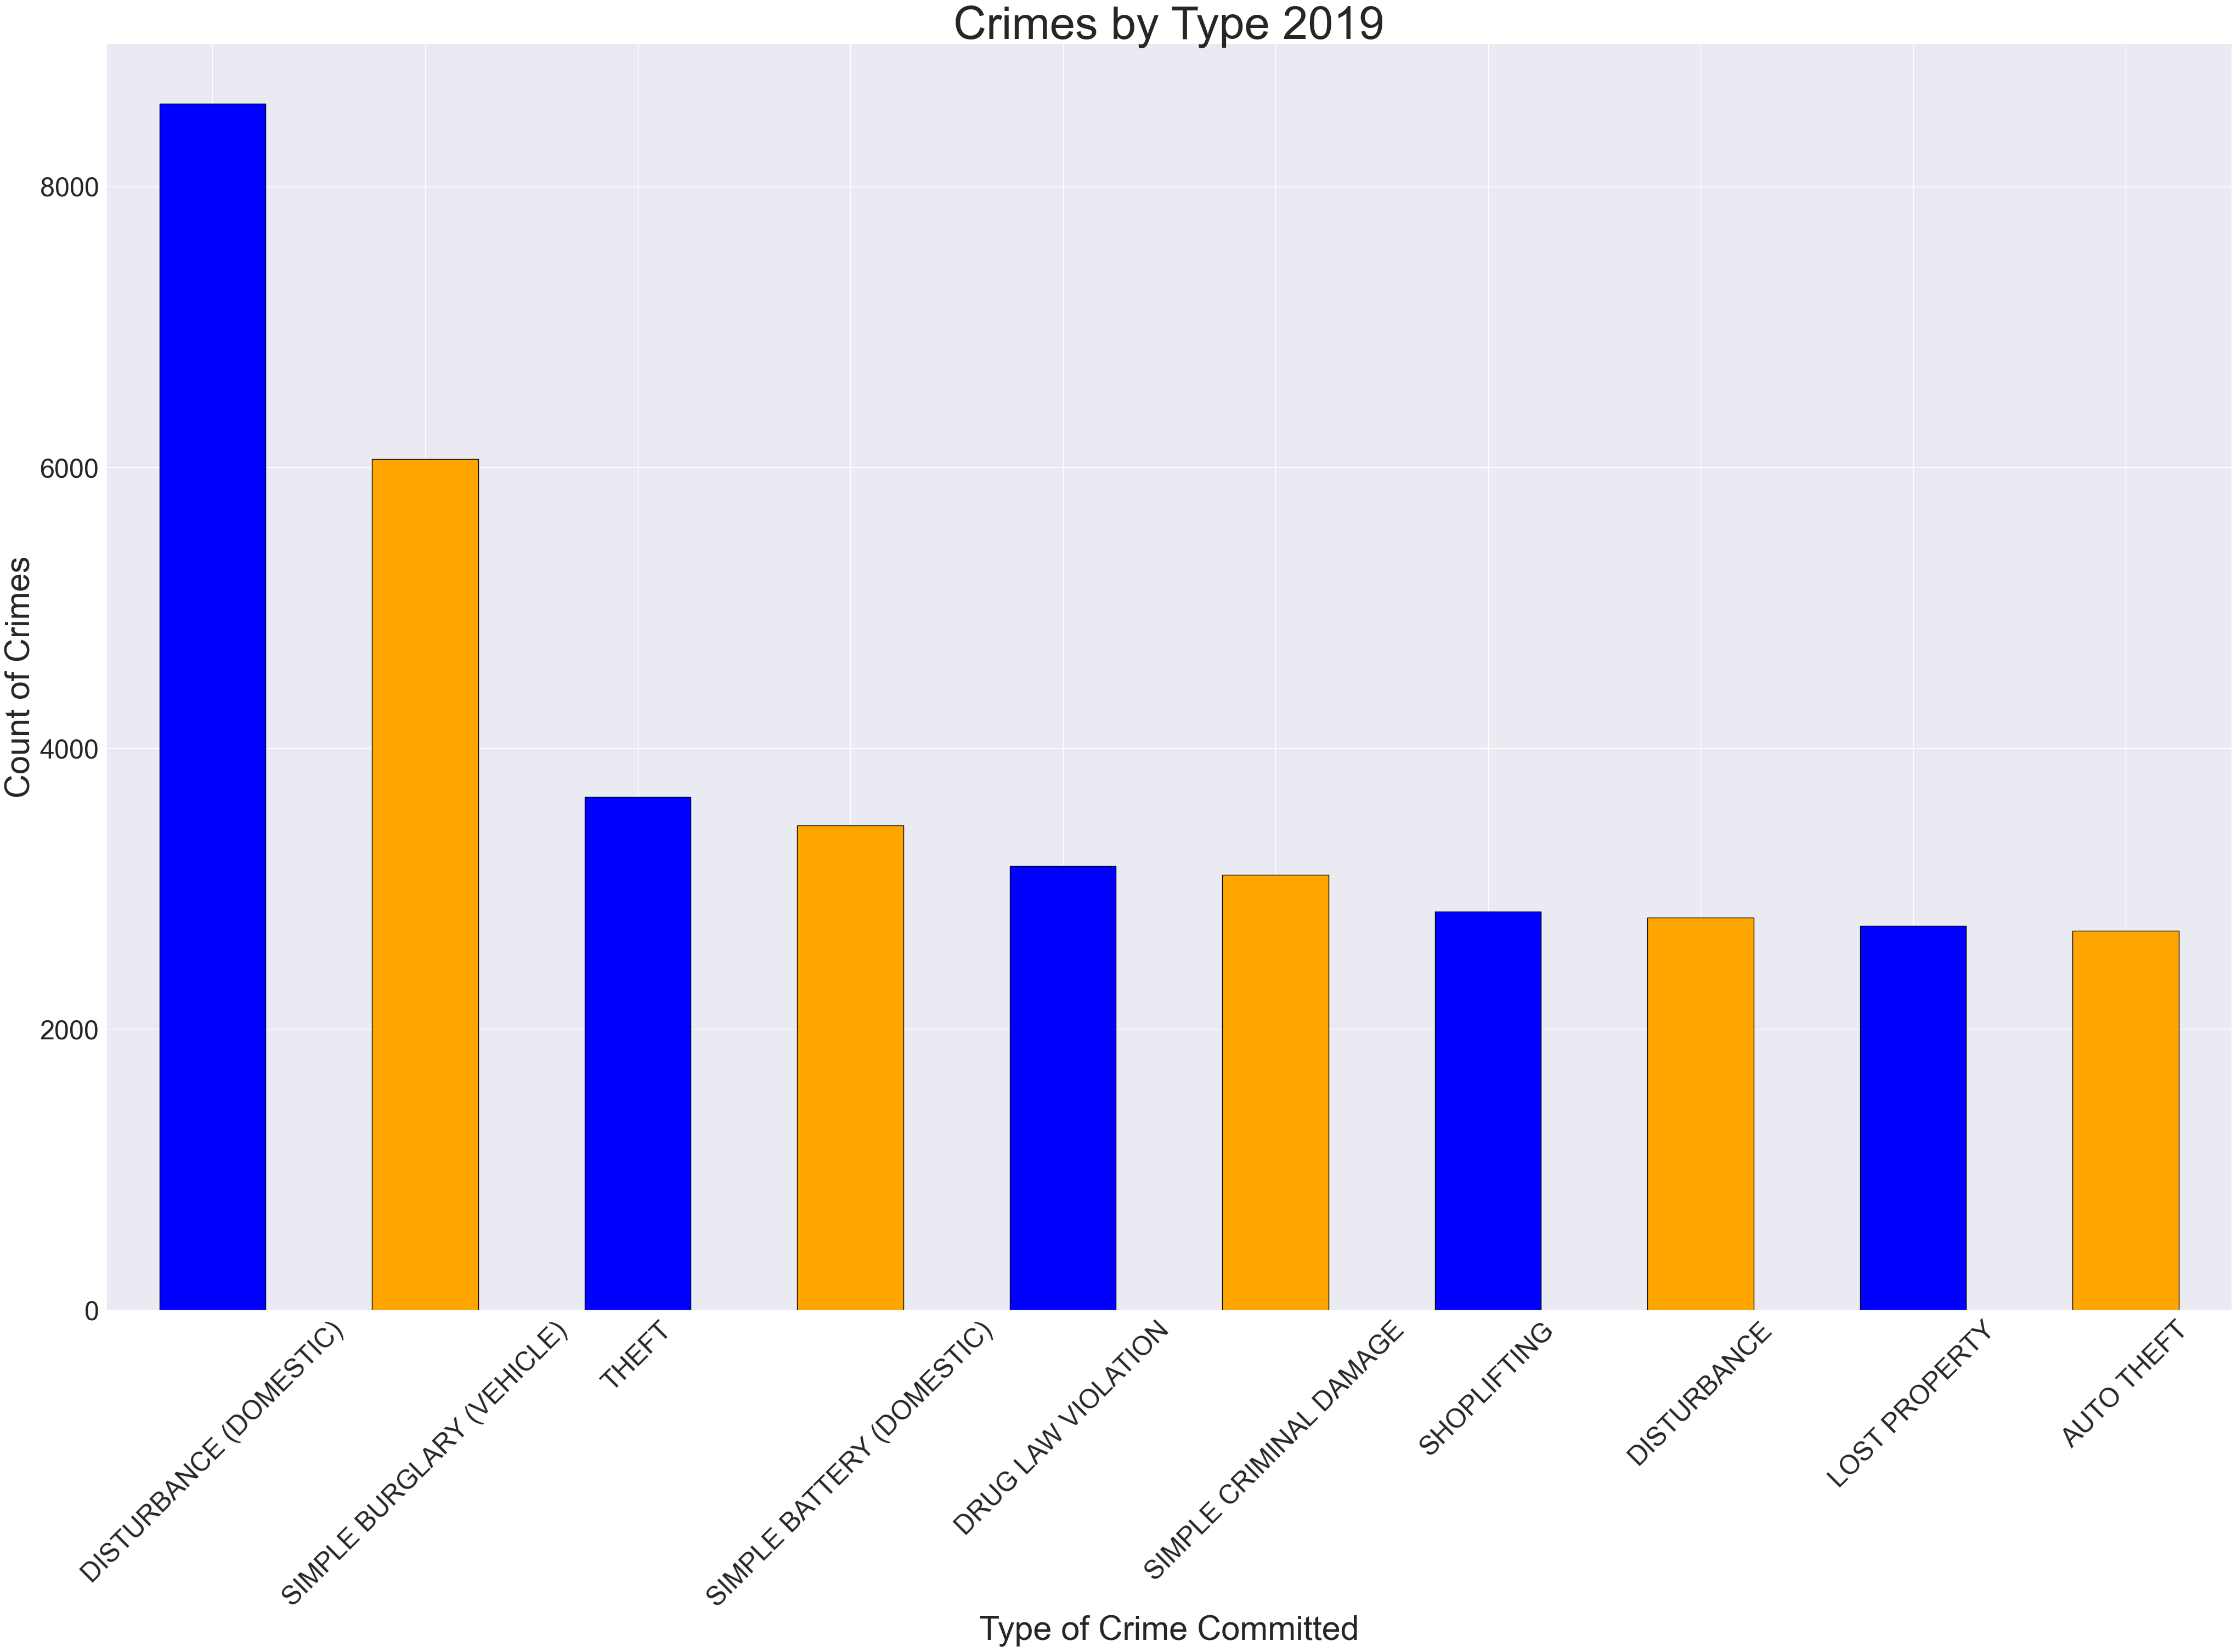

In [107]:
# Create a bar graph representing Signal_Description top ten with Counts
top_10_crimes_19.plot(kind='bar', edgecolor='black', rot=45, fontsize=35, color=["blue","orange"])
sns.set(style = 'darkgrid')
#add axis labels
plt.title("Crimes by Type 2019", fontsize=60)
plt.xlabel('Type of Crime Committed', fontsize=44)
plt.ylabel('Count of Crimes', fontsize=44)
plt.gcf().set_size_inches(50,30)
# Save the figure
plt.savefig("output_data/2019_crime_type.png")

In [108]:
reduced_crime_df.groupby("Signal_Description").count()

,Item_Number,Year,District,Signal_Type,Occurred_Date_Time,Offender_Gender,Victim_Fatal_Status
Signal_Description,,,,,,,
ABANDONED VEHICLE,17,17,17,17,17,0,17
AGGRAVATED ARSON,3,3,3,3,3,2,3
AGGRAVATED ASSAULT,491,491,491,491,491,396,491
AGGRAVATED ASSAULT (DOMESTIC),227,227,227,227,227,187,227
AGGRAVATED BATTERY,97,97,97,97,97,81,97
...,...,...,...,...,...,...,...
UNCLASSIFIED DEATH,165,165,165,165,165,0,165
UNDERAGE DRINKING,27,27,27,27,27,27,27
VIDEO VOYEURISM,68,68,68,68,68,21,68


In [109]:
district_crimes_19 = (reduced_crime_df["District"].value_counts())[:10]
district_crimes_19

7    11542
8     9134
5     7822
3     7293
6     7241
2     6527
1     6296
4     6174
Name: District, dtype: int64

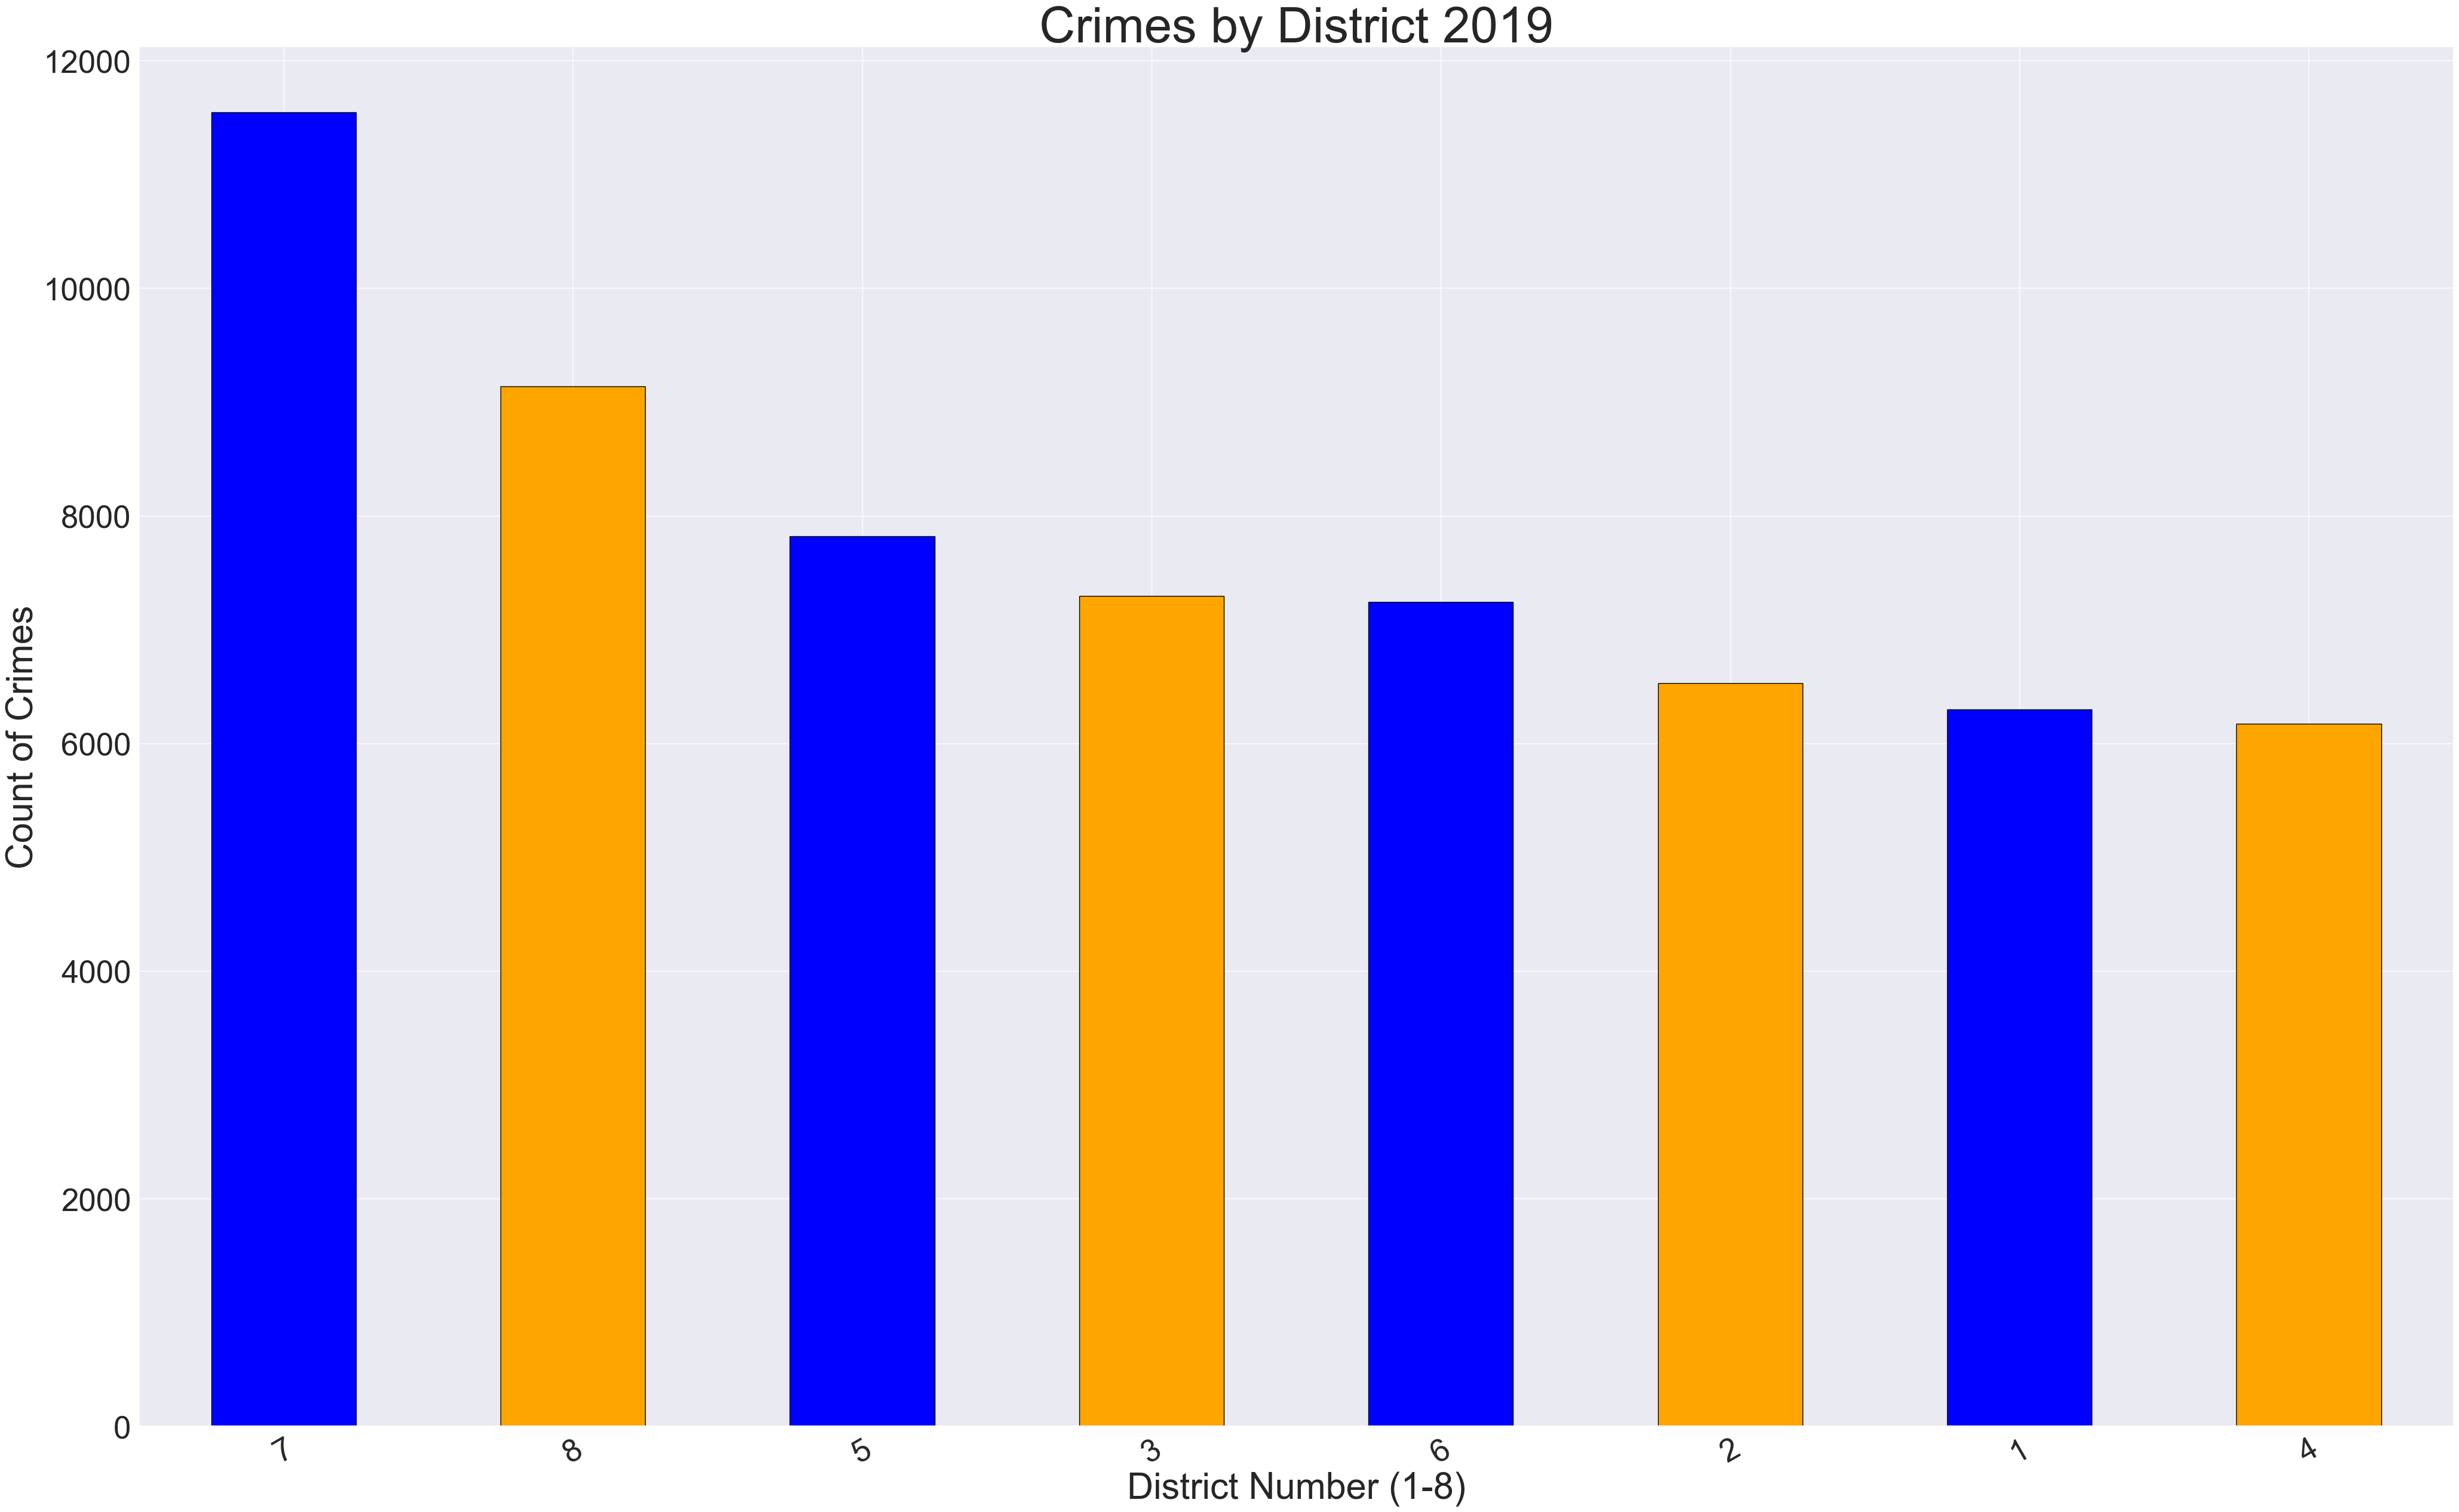

In [110]:
# Create a bar graph representing Signal_Description top ten with Counts
district_crimes_19.plot(kind='bar', edgecolor='black', rot=30, fontsize=38, color=["blue","orange"])
sns.set(style = 'darkgrid')

#add axis labels
plt.title("Crimes by District 2019", fontsize=60)
plt.xlabel('District Number (1-8)', fontsize=44)
plt.ylabel('Count of Crimes', fontsize=44)
plt.gcf().set_size_inches(50,30)
# Save the figure
plt.savefig("output_data/2019_district.png")

In [111]:
#crime_month = (reduced_crime_df["Occurred_Date_Time"].value_counts())[:10]
#crime_month

In [112]:
#fatality = reduced_crime_df["Victim_Fatal_Status"].value_counts()
#fatality

In [113]:
#reduced_crime_df["Offender_Gender"].value_counts().plot.pie(labels=["Male", "Female"], autopct="%.2f")
#plt.title("2019 Crime by Gender", fontsize=20)
# Save the figure
#plt.savefig("output_data/2019_gender.png")

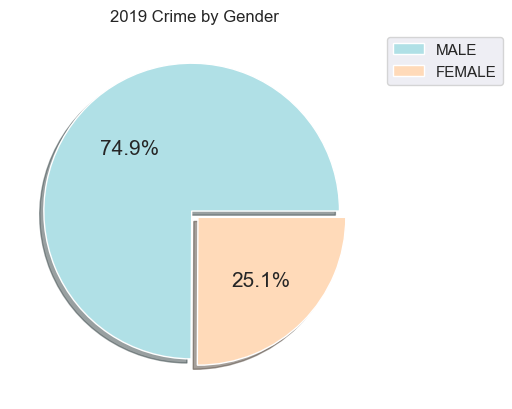

In [114]:
colors = ["#B0E0E6","#FFDAB9", "#B0E0E6","#FFDAB9"]
data = reduced_crime_df["Offender_Gender"].value_counts()
ax = data.plot(kind="pie", autopct='%1.1f%%', shadow=True, explode=[0.03, 0.03], colors=colors, legend=True, title="2019 Crime by Gender", fontsize=15, ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.savefig("output_data/2019_gender.png")
plt.show()

In [266]:
#reduced_crime_df.groupby("District")["Signal_Description"].count().sort_values(ascending=False)
#reduced_crime_df.groupby("Signal_Description")["District"].count().sort_values(ascending=True)
#reduced_crime_df.value_counts()